In [1]:
import os
import sys

sys.path.append("../python")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from data import Dataloader
from models import RandomExampleModel
import metrics

### Example

In [4]:
# Loading the data
data_loader = Dataloader("../data/dataset_4") # Specify path to the dataset you want to load
X, Y = data_loader.load()

In [27]:
# Let's train an example model
model = RandomExampleModel() # Instantiation of the model with hyperparameters, if needed
model.fit(X, Y) # Training of the model, using preference data

In [23]:
# First, let's see how our model reconsiders our preferences
# Our data preferences were X[i] >> Y[i] for all i, let's see if our model agrees
print((model.predict_utility(X) - model.predict_utility(Y))[:5]) # Preferred item has a higher utility

# predict_utility returns utility of samples for each cluster, returning shape (n_samples, n_clusters)

[[-0.06326043 -0.18471619]
 [-0.20129649 -0.33004454]
 [ 0.00500771 -0.09058298]
 [ 0.07658458  0.12828252]
 [-0.06293998 -0.07432317]]


In [28]:
model.predict_utility(X)

array([[0.58784814, 0.5184542 ],
       [0.53863346, 0.476744  ],
       [0.45795201, 0.43516468],
       ...,
       [0.63536172, 0.66930224],
       [0.62726187, 0.65917598],
       [0.45242475, 0.47161353]])

In [24]:
# Or we can directly use the predict_preference method:
print(model.predict_preference(X, Y)[:5]) # For each cluster we see if X is preferred to Y (0) or the contrary (1)
# predict_preference returns preference of samples for each cluster, returning shape (n_samples, n_clusters)
# 0 means that the cluster prefers first argument (here X[i]), 1 means that the cluster prefers second argument (here Y[i])

[[0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]]


In [25]:
# We consider that our model explains our data, if for at least one cluster, X[i] >> Y[i]
pairs_explained = np.sum(model.predict_preference(X, Y)[:5] == 0, axis=1) # For each sample check if each clusters prefers X[i] (then is True)
pairs_explained = pairs_explained > 0 # If at least one cluster prefers X[i], then X[i] >> Y[i] is explained
print("Percentage of explained preferences for 5 first samples:", np.sum(pairs_explained) / 5) # Get % or explained pairs

Percentage of explained preferences for 5 first samples: 0.8


In [7]:
# Or we call directly the right metric:
pairs_explained = metrics.PairsExplained()
print("Percentage of explained preferences for all samples:", pairs_explained.from_model(model, X, Y))
# Or other possibility:
print("Percentage of explained preferences for all samples:", pairs_explained(model.predict_utility(X), model.predict_utility(Y)))

Percentage of explained preferences for all samples: 0.9995
Percentage of explained preferences for all samples: 0.9995


In [27]:
# Now, we can also see how our model clusters our data
print(model.predict_cluster(X, Y)[:5]) # Returns for each sample which cluster is the most likely to have generated the preference.
# The most likely cluster is the one with the highest utility difference U(X[i])-U(Y[i]) for the sample.

[0 0 0 1 0]


In [6]:
# Ground truth are also provided:
Z = data_loader.get_ground_truth_labels()
# We can see how it compares to our model's predictions:
print(Z[:5])

[0 0 0 1 0]


In [8]:
# We have a metric to calculate how well the model has regrouped the preferences pairs compared to ground truth:
cluster_intersection = metrics.ClusterIntersection()

print("Cluster intersection for 5 first samples:", cluster_intersection(model.predict_cluster(X, Y)[:5], Z[:5]))

# Then for all data:
print("Cluster intersection for all samples:", cluster_intersection(model.predict_cluster(X, Y), Z))
print("Cluster intersection for all samples:", cluster_intersection.from_model(model, X, Y, Z))

Cluster intersection for 5 first samples: 1.0
Cluster intersection for all samples: 0.9940150075037518
Cluster intersection for all samples: 0.9940150075037518


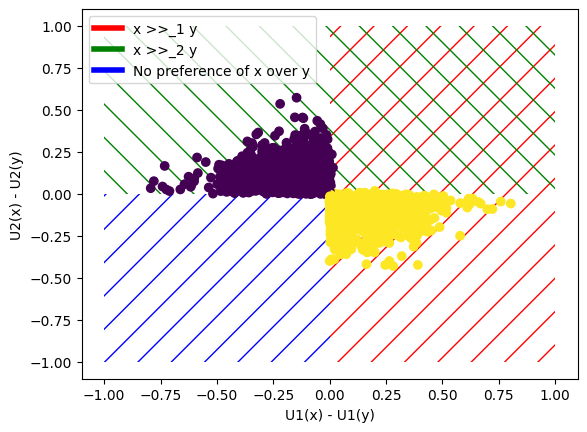

In [14]:
# Here is a proposition of a useful plot to see how the model clusters the data:
# We look at how each cluster evaluates U(x) - U(y) and color with ground truth clustering
# Note that x >>_1 y means that x is preferred to y for cluster 1
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

plt.figure()
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")

plt.gca().add_patch(Rectangle((0,-1.),1., 2.,
                    edgecolor='red',
                    facecolor='none',
                    lw=0, 
                    hatch='/'))
plt.gca().add_patch(Rectangle((-1.,0), 2., 1.,
                    edgecolor='green',
                    facecolor='none',
                    lw=0, 
                    hatch='\\'))
plt.gca().add_patch(Rectangle((-1.,-1.),1., 1.,
                    edgecolor='blue',
                    facecolor='none',
                    hatch='/',
                    lw=0))
plt.scatter(model.predict_utility(X)[:, 0]-model.predict_utility(Y)[:, 0], 
            model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1], c=Z)

custom_lines = [Line2D([0], [0], color="red", lw=4),
                Line2D([0], [0], color="green", lw=4),
                Line2D([0], [0], color="b", lw=4)]

plt.legend(custom_lines, ['x >>_1 y', "x >>_2 y ", 'No preference of x over y'])
plt.show()

### Simple model

In [3]:
# Loading the data
data_loader_simple = Dataloader("../data/dataset_4") # Specify path to the dataset you want to load
X_simple, Y_simple = data_loader_simple.load()
Z_simple = data_loader_simple.get_ground_truth_labels()

Our random model cannot explain a large part of our preference data. Your first assigment will be to write a Mixed-Interger Programming algorithm that will be able to do so.

In [8]:
# This cell should work when you have completed the TwoClustersMIP model
from models import TwoClustersMIP

cluster_intersection_simple = metrics.ClusterIntersection()
pairs_explained_simple = metrics.PairsExplained()

parameters = {"n_pieces": 5,"n_clusters":2} # Can be completed
model_simple = TwoClustersMIP(**parameters)
model_simple.fit(X_simple, Y_simple)

# Uncomment once your model is working
print("Percentage of explained preferences on train data:", pairs_explained_simple.from_model(model_simple, X_simple, Y_simple)) # You should get 1.0 with the right MIP
print("Percentage of preferences well regrouped into clusters:", cluster_intersection_simple.from_model(model_simple, X_simple, Y_simple, Z_simple))

## 78 minutes with epsilon contraint  for the monotony(0.001)
## 30 secondes with no epsilon for monotony(0.00001)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6050 rows, 12048 columns and 75836 nonzeros
Model fingerprint: 0xf90ff9d7
Variable types: 8048 continuous, 4000 integer (4000 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 184.0466580
Presolve removed 2016 rows and 8008 columns
Presolve time: 0.08s
Presolved: 4034 rows, 4040 columns, 53876 nonzeros
Variable types: 2040 continuous, 2000 integer (2000 binary)

Root relaxation: objective 0.000000e+00, 2268 iterations, 0.20 seconds (0.37 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumb

In [23]:
model.model.getVarByName(name = "binary_0_8")

<gurobi.Var binary_0_8 (value 0.0)>

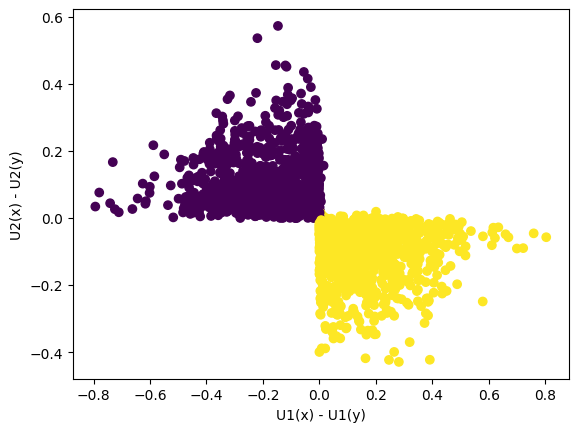

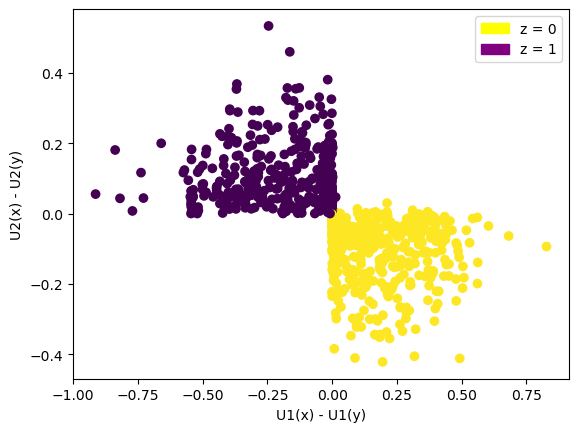

In [9]:
# As an example here are the results obtained with:
# Uncomment the code to check your results
plt.figure()
plt.scatter(model_simple.predict_utility(X_simple)[:, 0]-model_simple.predict_utility(Y_simple)[:, 0], 
            model_simple.predict_utility(X_simple)[:, 1]-model_simple.predict_utility(Y_simple)[:, 1], c=Z_simple)
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")
plt.show()

# Here is how it should look like
from IPython.display import Image
Image("../images/MIP_results_example.png")

Your second assignement will be to find another model that will work well with larger data instances.

### Complex Model

In [2]:
# Loading the data
data_loader_hard = Dataloader("../data/dataset_10") # Specify path to the dataset you want to load
X_hard, Y_hard = data_loader_hard.load()
Z_hard = data_loader_hard.get_ground_truth_labels()

cluster_intersection_hard = metrics.ClusterIntersection()
pairs_explained_hard = metrics.PairsExplained()

In [3]:
from models import HeuristicModel

model_hard = HeuristicModel()
model_hard.fit(X_hard, Y_hard)

# Uncomment once your model is working
print("Percentage of explained preferences on train data:", pairs_explained_hard.from_model(model_hard, X_hard, Y_hard)) # You should get 1.0 with the right MIP
print("Percentage of preferences well regrouped into clusters:", cluster_intersection_hard.from_model(model_hard, X_hard, Y_hard, Z_hard))

# Ca marche étrangement bien

Set parameter Username


Academic license - for non-commercial use only - expires 2024-12-18


c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 40185 rows, 160188 columns and 1473306 nonzeros
Model fingerprint: 0x2a1b8112
Coefficient statistics:
  Matrix range     [5e-06, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-03, 1e+00]
Presolve removed 60 rows and 120036 columns
Presolve time: 6.12s
Presolved: 150 rows, 40275 columns, 1168622 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 Free vars  : 3
 AA' NZ     : 3.675e+03
 Factor NZ  : 3.825e+03 (roughly 16 MB of memory)
 Factor Ops : 1.288e+05 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          D

In [21]:
model.model.getVarByName("u_2_2_3")

<gurobi.Var u_2_2_3 (value 0.04287536304665353)>

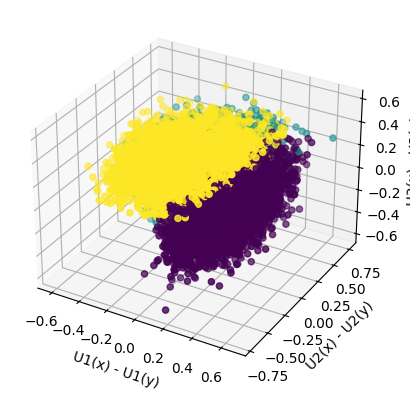

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Calculate the differences in utility values
u_diff_x = model_hard.predict_utility(X_hard)
u_diff_y = model_hard.predict_utility(Y_hard)
u_diff = u_diff_x - u_diff_y

# Extract individual utility differences
u1_diff = u_diff[:, 0]
u2_diff = u_diff[:, 1]
u3_diff = u_diff[:, 2]

# Scatter plot
ax.scatter(u1_diff, u2_diff, u3_diff, c=Z_hard)

ax.set_xlabel("U1(x) - U1(y)")
ax.set_ylabel("U2(x) - U2(y)")
ax.set_zlabel("U3(x) - U3(y)")

plt.show()

In [6]:
import plotly.graph_objects as go

# Calculate differences in utility
diff_u1 = model_hard.predict_utility(X_hard)[:, 0] - model_hard.predict_utility(Y_hard)[:, 0]
diff_u2 = model_hard.predict_utility(X_hard)[:, 1] - model_hard.predict_utility(Y_hard)[:, 1]
diff_u3 = model_hard.predict_utility(X_hard)[:, 2] - model_hard.predict_utility(Y_hard)[:, 2]

# Create 3D scatter plot
fig = go.Figure(data=go.Scatter3d(
    x=diff_u1,
    y=diff_u2,
    z=diff_u3,
    mode='markers',
    marker=dict(
        size=8,
        color=Z_hard,                # Set color to Z_hard values
        colorscale='Viridis',       # Choose a colorscale
        opacity=1.0
    )
))

# Set labels and title
fig.update_layout(scene=dict(
                    xaxis_title='U1(x) - U1(y)',
                    yaxis_title='U2(x) - U2(y)',
                    zaxis_title='U3(x) - U3(y)'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

# Show the plot
fig.show()

### Small vizualisations of the distribution of X-Y

C:\Users\matth\AppData\Local\Temp\ipykernel_13296\455659155.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=Z, cmap=plt.cm.get_cmap('viridis', len(np.unique(Z))), alpha=0.7)


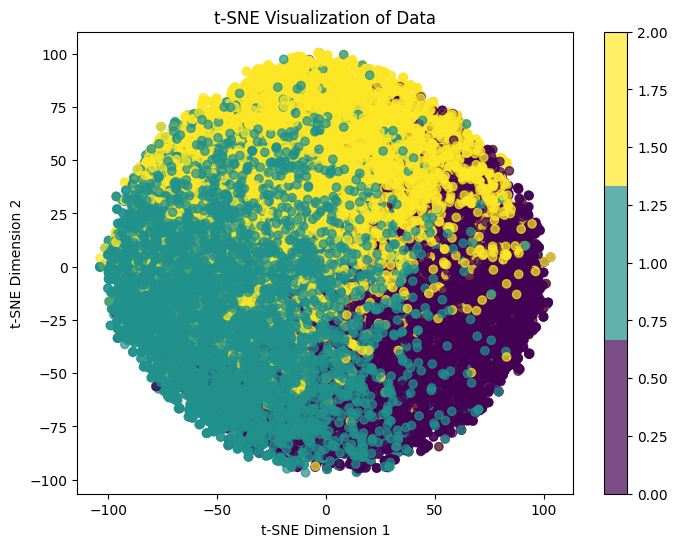

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming you have loaded your data into X, Y, and Z
# X and Y are numpy arrays representing individual vectors, and Z is labels

# Combine X and Y into one array
data = X-Y

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(data)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=Z, cmap=plt.cm.get_cmap('viridis', len(np.unique(Z))), alpha=0.7)
plt.colorbar()
plt.title('t-SNE Visualization of Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

C:\Users\matth\AppData\Local\Temp\ipykernel_13296\3384890841.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=Z, cmap=plt.cm.get_cmap('viridis', len(np.unique(Z))), alpha=0.7)


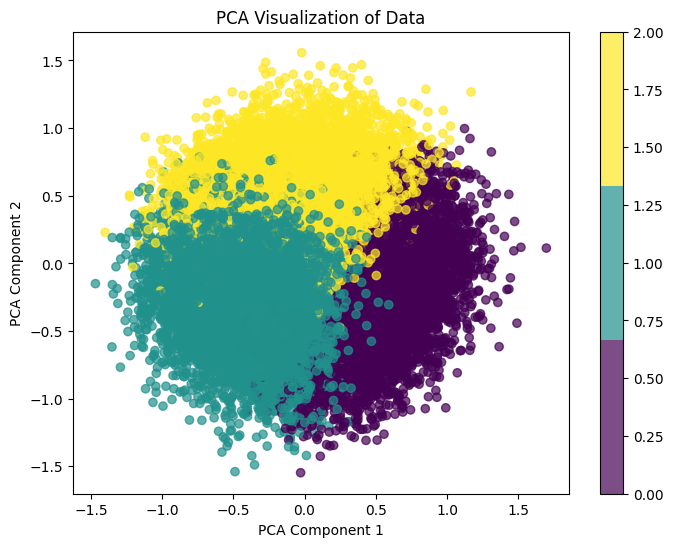

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have loaded your data into X, Y, and Z
# X and Y are numpy arrays representing individual vectors, and Z is labels

# Combine X and Y into one array
data = X-Y

# Perform PCA dimensionality reduction
pca = PCA(n_components=2)
embedded_data = pca.fit_transform(data)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=Z, cmap=plt.cm.get_cmap('viridis', len(np.unique(Z))), alpha=0.7)
plt.colorbar()
plt.title('PCA Visualization of Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have loaded your data into X, Y, and Z
# X and Y are numpy arrays representing individual vectors, and Z is labels

# Combine X and Y into one array
data =X-Y

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(data)

pca = PCA(n_components=2)
embedded_data = pca.fit_transform(data)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=cluster_labels, cmap=plt.cm.get_cmap('viridis', len(np.unique(Z))), alpha=0.7)
plt.colorbar()
plt.title('PCA Visualization of Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


NameError: name 'PCA' is not defined

In [26]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import accuracy_score

# Assuming cluster_labels contains the predicted cluster labels
# and Z contains the ground truth labels

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(Z, cluster_labels)
acc = accuracy_score(Z, cluster_labels)

print("Adjusted Rand Index (ARI):", ari)
print("accuracy (ACC):", acc)

Adjusted Rand Index (ARI): 0.4851524557856698
accuracy (ACC): 0.7949352532373382
